# EDA

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    roc_curve, precision_recall_curve, roc_auc_score, \
    confusion_matrix, classification_report

%matplotlib inline
plt.style.use('default')
warnings.filterwarnings("ignore")

DATA_DIR = "../data"

## Check out data
What data do we have?

In [2]:
os.listdir(DATA_DIR)

['data.zip', 'data.csv', 'data.info', 'data.json']

In [3]:
DATA_CSV = os.path.join(DATA_DIR, 'data.csv')
DATA_INFO = os.path.join(DATA_DIR, 'data.info')

In [4]:
df_csv = pd.read_csv(DATA_CSV)
df_info = pd.read_csv(DATA_INFO)

In [5]:
df_csv.head()

,transcript_id,transcript_position,nucleotides,0,1,2,3,4,5,6,7,8
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2


In [6]:
df_info.head()

,gene_id,transcript_id,transcript_position,label
0,ENSG00000004059,ENST00000000233,244,0
1,ENSG00000004059,ENST00000000233,261,0
2,ENSG00000004059,ENST00000000233,316,0
3,ENSG00000004059,ENST00000000233,332,0
4,ENSG00000004059,ENST00000000233,368,0


In [7]:
print(df_csv.shape)
print(df_info.shape)

(11027106, 12)
(121838, 4)


## Merge data
Merge signal data (`data.csv`) and its labels (`data.info`) using `transcript_id` and `transcript_position` columns.

In [8]:
df = df_csv.merge(df_info, how='left', on=['transcript_id', 'transcript_position'])

In [9]:
df.head()

,transcript_id,transcript_position,nucleotides,0,1,2,3,4,5,6,7,8,gene_id,label
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1,ENSG00000004059,0
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9,ENSG00000004059,0
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6,ENSG00000004059,0
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4,ENSG00000004059,0
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2,ENSG00000004059,0


In [10]:
df.shape

(11027106, 14)

In [11]:
df.dtypes

transcript_id           object
transcript_position      int64
nucleotides             object
0                      float64
1                      float64
2                      float64
3                      float64
4                      float64
5                      float64
6                      float64
7                      float64
8                      float64
gene_id                 object
label                    int64
dtype: object

In [12]:
# designate data types
df['label'] = df['label'].astype(str)
df['transcript_position'] = df['transcript_position'].astype(str)

## Null values

In [13]:
# check for null values
df.isnull().sum()

transcript_id          0
transcript_position    0
nucleotides            0
0                      0
1                      0
2                      0
3                      0
4                      0
5                      0
6                      0
7                      0
8                      0
gene_id                0
label                  0
dtype: int64

In [ ]:
df.to_csv(os.path.join(DATA_DIR, 'df1_merged.csv'), index=False)

## Duplicated rows

In [14]:
# check for duplicated rows
df[df.duplicated(keep=False)].head()

,transcript_id,transcript_position,nucleotides,0,1,2,3,4,5,6,7,8,gene_id,label
797596,ENST00000233146,1534,GTGACTC,0.00344,2.49,101.0,0.00332,9.27,124.0,0.00495,3.47,87.8,ENSG00000095002,0
797608,ENST00000233146,1534,GTGACTC,0.00344,2.49,101.0,0.00332,9.27,124.0,0.00495,3.47,87.8,ENSG00000095002,0
797617,ENST00000233146,1588,GAAACAA,0.00771,3.35,104.0,0.00764,3.35,99.7,0.00538,2.16,87.9,ENSG00000095002,0
797622,ENST00000233146,1588,GAAACAA,0.00771,3.35,104.0,0.00764,3.35,99.7,0.00538,2.16,87.9,ENSG00000095002,0
797649,ENST00000233146,1616,AAAACCA,0.00498,3.31,109.0,0.00631,3.56,102.0,0.00365,2.57,85.0,ENSG00000095002,0


In [15]:
# drop duplicated rows
df.drop_duplicates(keep='first', inplace=True, ignore_index=True)

In [16]:
df.shape
# originally 11027106 rows, 172 rows dropped

(11026934, 14)

In [18]:
df.to_csv(os.path.join(DATA_DIR, 'df2_no_duplicates.csv'), index=False)

## Class imbalance

In [17]:
# check for class imbalance
df['label'].value_counts()

0    10527372
1      499562
Name: label, dtype: int64

<AxesSubplot: xlabel='label', ylabel='count'>

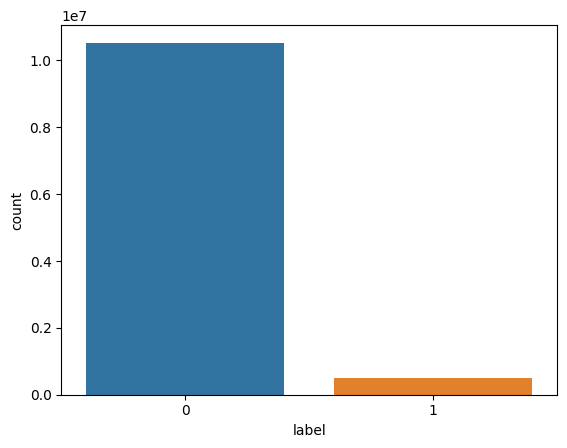

In [18]:
sns.countplot(x=df['label'])

## Categorical variable distribution (barplot)

Index(['transcript_id', 'transcript_position', 'nucleotides', 'gene_id',
       'label'],
      dtype='object')


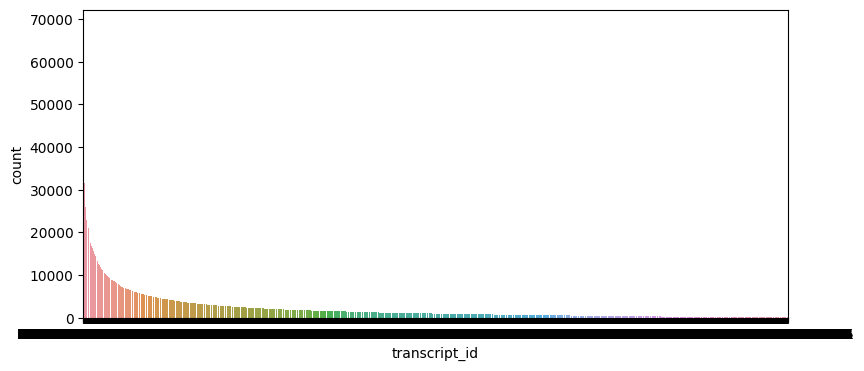

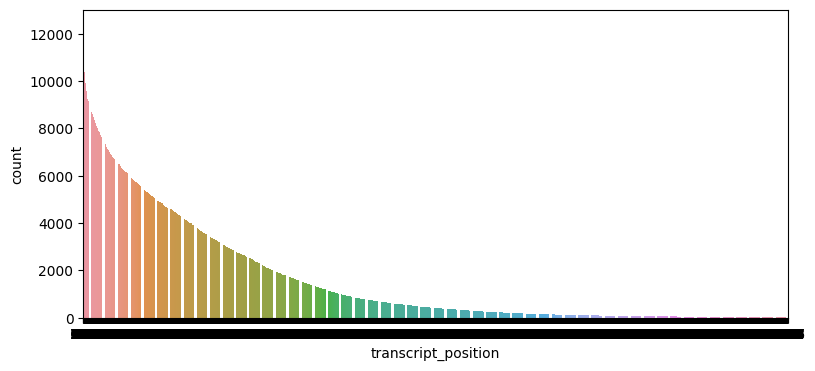

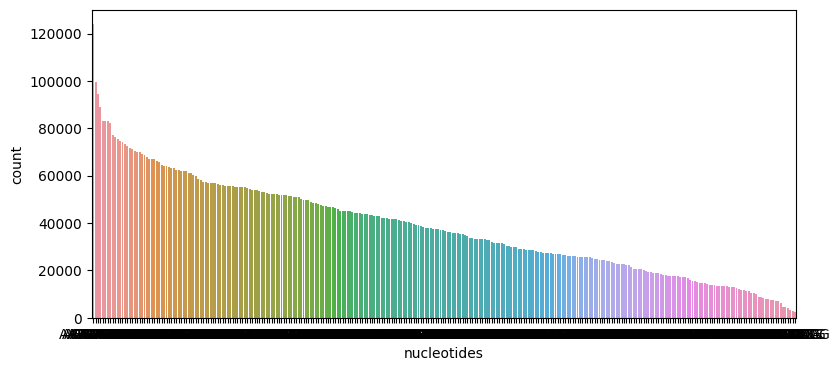

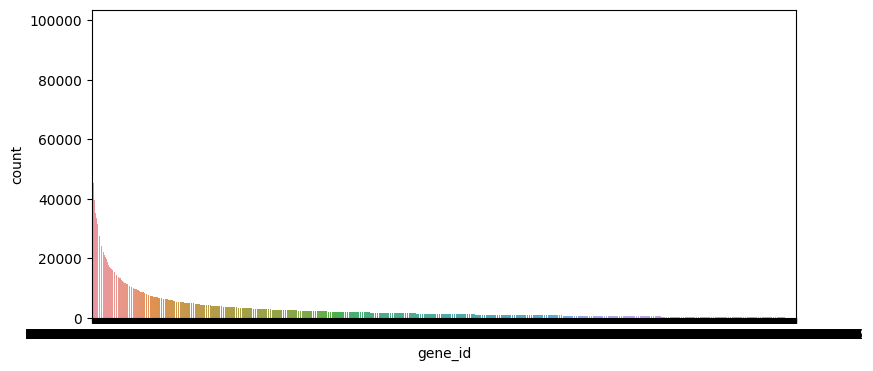

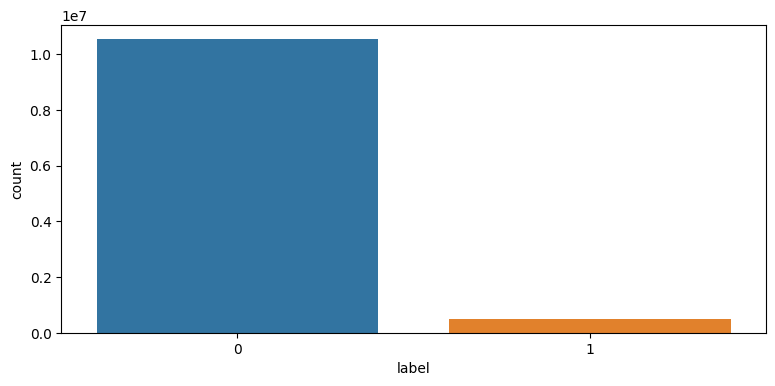

In [19]:
# indentifying the categorical variables
cat_var = df.select_dtypes(include=["object"]).columns
print(cat_var)

for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=df[column], order=df[column].value_counts().index)

## Numerical variable distribution (histogram)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8'], dtype='object')


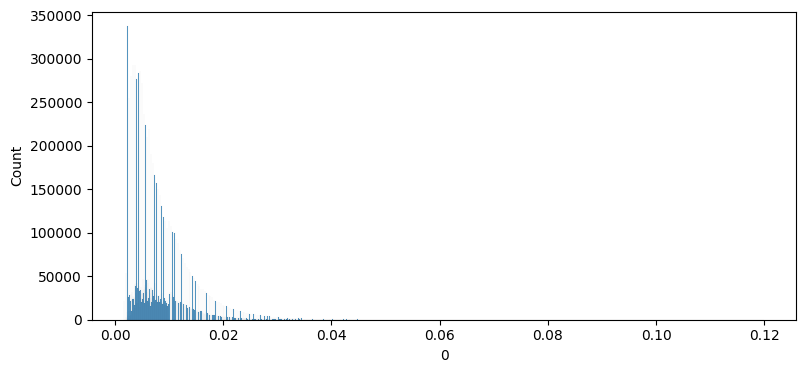

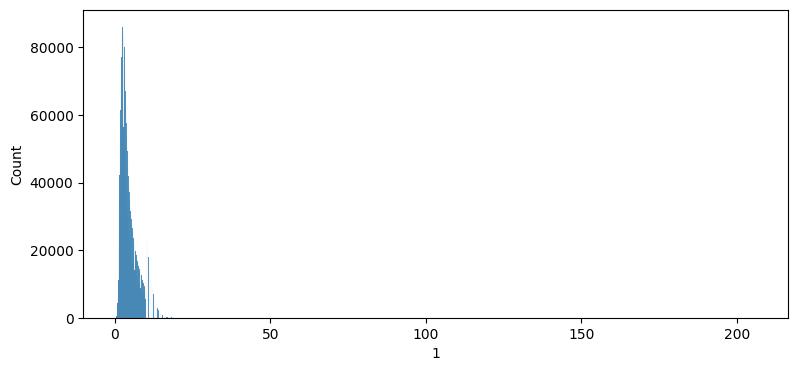

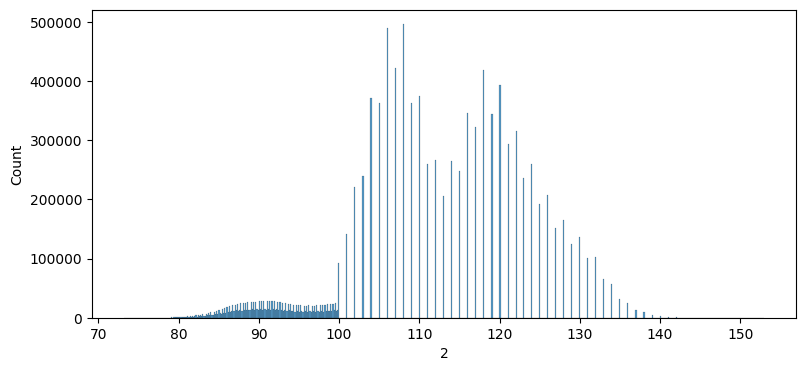

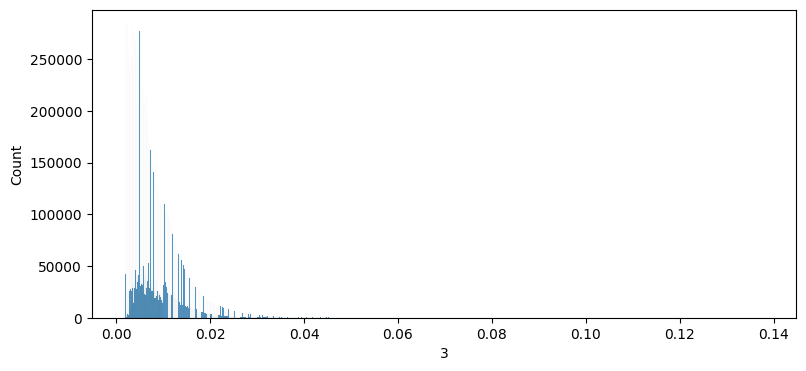

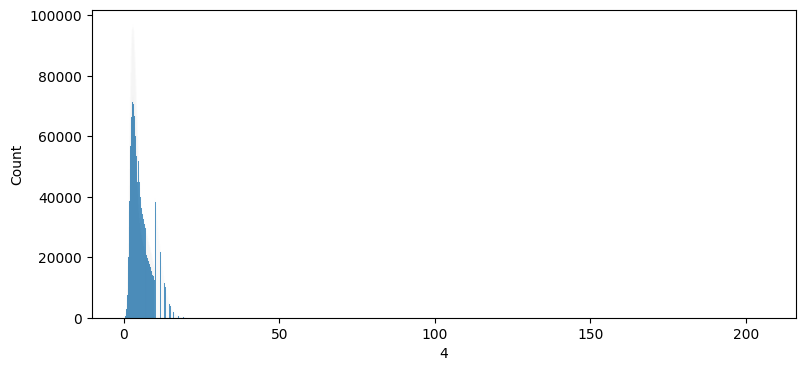

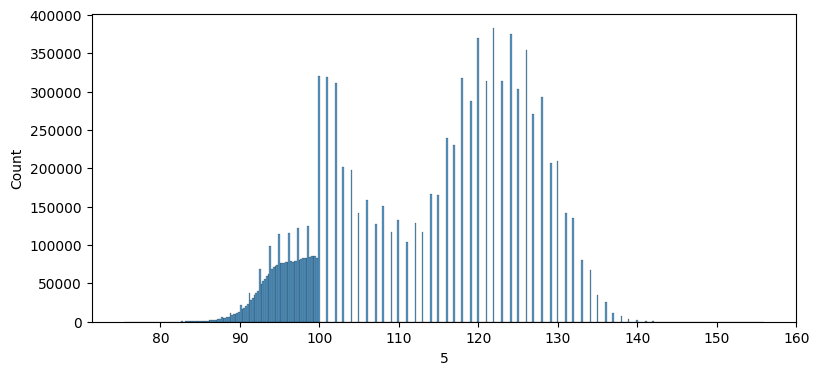

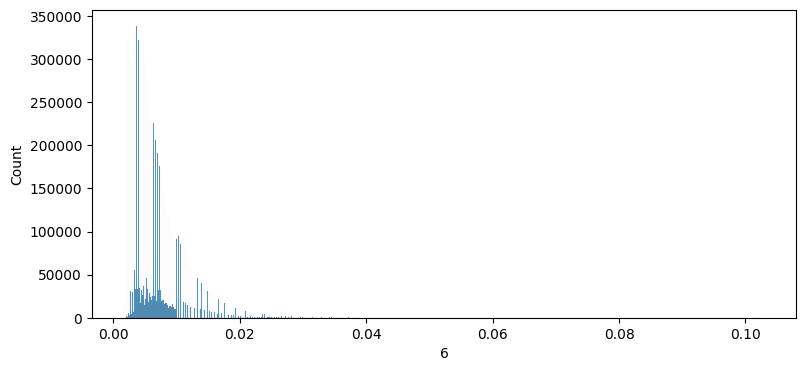

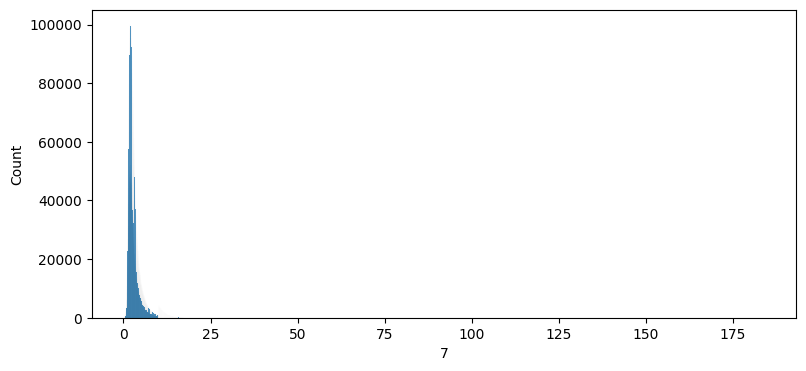

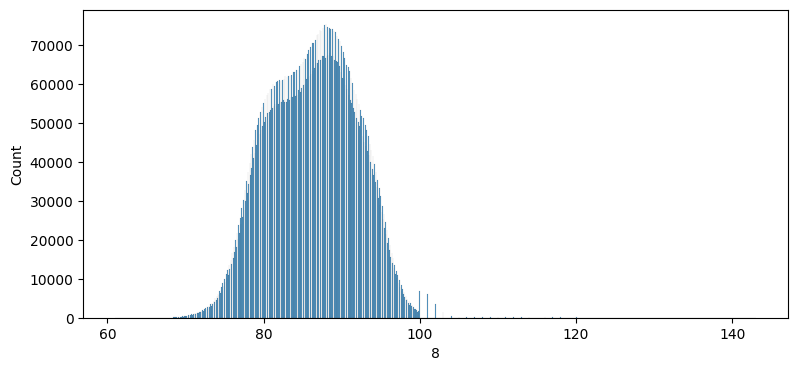

In [20]:
# indentifying the categorical variables
num_var = df.select_dtypes(include=np.number).columns
print(num_var)

# plotting histogram for each numerical variable
for column in num_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.histplot(df[column])

## Scale numerical variables
Scale numerical variables to be between 0 to 1

In [22]:
df_scaled = df
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
df_scaled[num_var]= scaler.fit_transform(df_scaled[num_var])

In [20]:
df_scaled.head()

,transcript_id,transcript_position,nucleotides,0,1,2,3,4,5,6,7,8,gene_id,label
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1,ENSG00000004059,0
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9,ENSG00000004059,0
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6,ENSG00000004059,0
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4,ENSG00000004059,0
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2,ENSG00000004059,0


In [23]:
df_scaled.to_csv(os.path.join(DATA_DIR, "df3_scaled.csv"), index=False)

## Seperate features and label

In [23]:
X = df_scaled[['transcript_position', '0', '1', '2', '3', '4', '5', '6', '7', '8']]
y = df_scaled[['label']]

## Feature correlation

<AxesSubplot: >

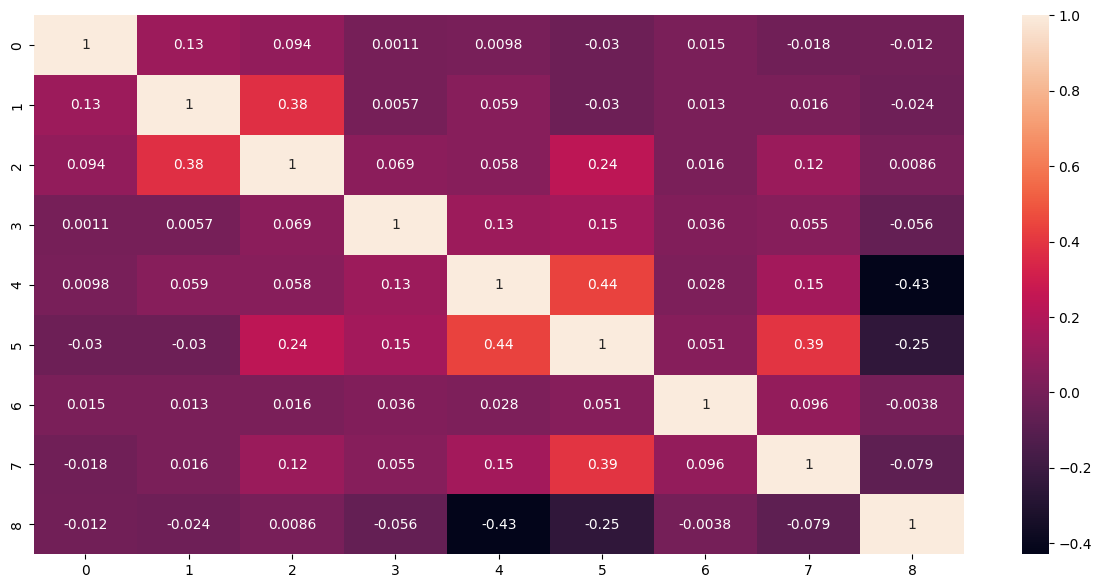

In [24]:
plt.figure(figsize=(15,7))
sns.heatmap(df_scaled.corr(), annot=True)

## Train test split

In [32]:
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
print(ytr['label'].value_counts())
print(yte['label'].value_counts())

0    8421897
1     399650
Name: label, dtype: int64
0    2105475
1      99912
Name: label, dtype: int64
